# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

In [1]:
# Importando Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Carregando a Base de dados
bill_tip = sns.load_dataset('tips')
bill_tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
bill_tip['net_bill'] = bill_tip['total_bill'] - bill_tip['tip']

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, dinner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [4]:
# 1. Criando as matrizes X e y
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', bill_tip[:10])
X

DesignMatrix with shape (10, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [5]:
# 2. Remover variáveis não significativas
# Descobrindo a interação entre as variáveis
mod1 = sm.OLS(y,X).fit()

mod1.summary()

C:\Users\marin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     3.816
Date:                Sun, 03 Nov 2024   Prob (F-statistic):             0.0757
Time:                        00:25:53   Log-Likelihood:                -11.065
No. Observations:                  10   AIC:                             28.13
Df Residuals:                       7   BIC:                             29.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2814      0.286      0.982      0.359      -0.396       0.959
sex[T.Female]     -1.0632      0.711     -1.495      0.179      -2.745       0.619
smoker[T.No]       0.2814      0.286      0.982      0.359      -0.396       0.959
time[T.Dinner]     0.2814      0.286      0.982      0.359      -0.396       0.959
net_bill           0.1369      0.052      2.610      0.035       0.013       0.261
==============================================================================
Omnibus:                        2.310   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                0.882
Skew:                           0.099   Prob(JB):                        0.643
Kurtosis:                       1.559   Cond. No.                     2.32e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.33e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observando o valor de P-value notamos que a única variável que a tem inferior a 5% é a "net_bill" portanto podemos remover as outras.

In [6]:
# Removendo as variáveis
y, X = patsy.dmatrices('tip ~ net_bill', bill_tip)

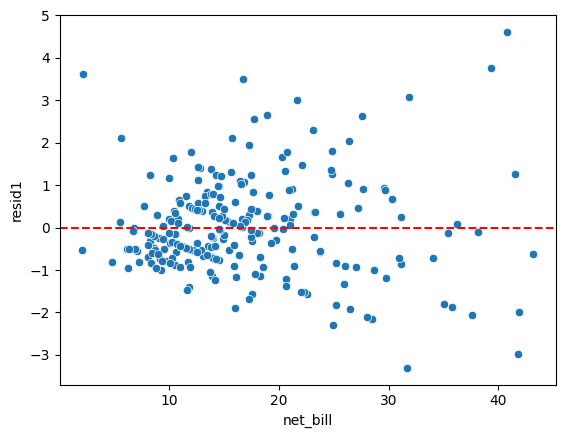

In [7]:
# 3. Gráfico de resíduos por "net_bill"
# Criando o resíduo
reg1 = sm.OLS(y,X).fit()
bill_tip['resid1'] = reg1.resid

#Plotando o gráfico
sns.scatterplot(x = 'net_bill', y = 'resid1', data = bill_tip)
plt.axhline(y=0, color='r', linestyle='--')

In [8]:
# 4.Transformar net_bill no log e um polinômio.
# Transformar em log
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', bill_tip)

mod2 = sm.OLS(y,X).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           4.40e-20
Time:                        00:25:53   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Transformar em polinômio 2º grau
y, X = patsy.dmatrices('tip ~ I(net_bill ** 2) + net_bill', bill_tip)

mod3 = sm.OLS(y,X).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           4.96e-22
Time:                        00:25:53   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0743      0.353      3.039      0.003       0.378       1.770
I(net_bill ** 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
net_bill             0.1288      0.037      3.493      0.001       0.056       0.202
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O modelo de polinômio tem p-value = 0,001 e o valor de R² 0,334 portanto ela é a melhor aproximação.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
# 1. Criar matriz de design e y, no log de tip, explicado por sex, smoker, diner e net_bill
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', bill_tip)

# Matriz de design
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [11]:
# Matriz y
y

DesignMatrix with shape (244, 1)
  np.log(tip)
      0.00995
      0.50682
      1.25276
      1.19695
      1.28371
      1.54969
      0.69315
      1.13783
      0.67294
      1.17248
      0.53649
      1.60944
      0.45108
      1.09861
      1.10526
      1.36609
      0.51282
      1.31103
      1.25276
      1.20896
      1.40610
      1.01160
      0.80200
      2.02551
      1.15688
      0.85015
      0.69315
      0.69315
      1.45862
      1.09861
  [214 rows omitted]
  Terms:
    'np.log(tip)' (column 0)
  (to view full data, use np.asarray(this_obj))

In [12]:
# 2. Remover as variáveis não significantes.
# Descobrindo a interação entre as variáveis
mod4 = sm.OLS(y, X).fit()

mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           1.21e-18
Time:                        00:25:53   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nesse modelo a única variável que parece significante é net_bill, portanto é a única variável a ser considerada.

In [13]:
# Removendo as variáveis
y, X = patsy.dmatrices('np.log(tip) ~ net_bill', bill_tip)

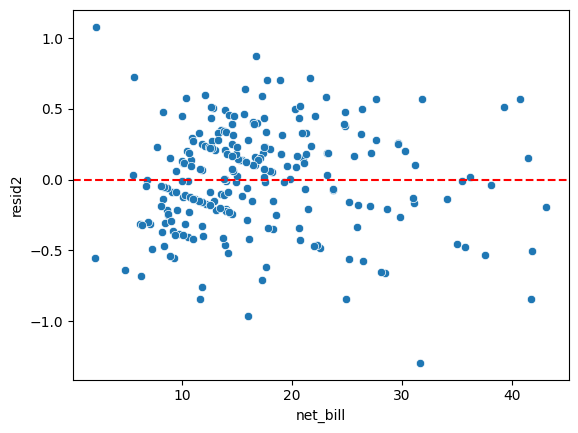

In [14]:
# 3. Gráfico de resíduos por "net_bill"
# Criando o resíduo
reg2 = sm.OLS(y, X).fit()
bill_tip['resid2'] = reg2.resid

#Plotando o gráfico
sns.scatterplot(x = 'net_bill', y = 'resid2', data = bill_tip)
plt.axhline(y=0, color='r', linestyle='--')

In [15]:
# 4. Transformar net_bill no log e um polinômio.
# Transformar em log
y, X = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', bill_tip)
mod5 = sm.OLS(y, X).fit()
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           5.62e-22
Time:                        00:25:53   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='tip', ylabel='resid3'>

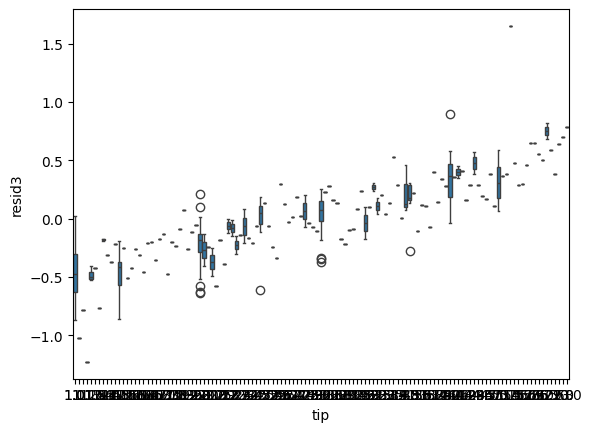

In [16]:
bill_tip['resid3'] = mod5.resid

# Gráfico
sns.boxplot(x = 'tip', y = 'resid3', data = bill_tip)

In [17]:
# Transformar em polinômio
y, X = patsy.dmatrices('np.log(tip) ~ I(net_bill**2) + net_bill', bill_tip)
mod6 = sm.OLS(y, X).fit()
mod6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           2.82e-22
Time:                        00:25:55   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1887      0.111      1.698      0.091      -0.030       0.408
I(net_bill ** 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
net_bill             0.0655      0.012      5.642      0.000       0.043       0.088
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='tip', ylabel='resid4'>

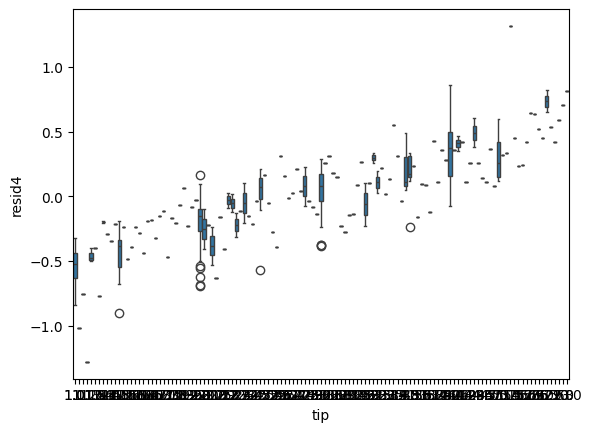

In [18]:
bill_tip['resid4'] = mod6.resid

# Gráfico
sns.boxplot(x = 'tip', y = 'resid4', data = bill_tip)

O modelo de logarítmico parece ter melhor aproximação considerando os a variação apresentada nos gráficos.

In [19]:
# 5. Comparar o R² desse modelo na escala de tip (sem o log) com o modelo do item 1.
# Calcular o R² desse modelo para tip
bill_tip['%tip'] = np.exp(mod6.fittedvalues)
bill_tip[['%tip', 'tip']].corr().iloc[0, 1]**2

0.3290849111468198

Como o modelo I desse exercício tem R² = 0,334, maior que o do modelo II, R² = 0,329, este é conseiderado um melhor modelo. 

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [20]:
# Importando base de dados
renda = pd.read_csv('previsao_de_renda.csv')
renda.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [21]:
# 1. Explicar renda como variável resposta, por tempo_emprego como variável explicativa, com regressão simples.
reg_sim1 = smf.ols('renda ~ tempo_emprego', data = renda).fit()
reg_sim1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:25:56   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
reg_sim2 = smf.ols('renda ~ np.log(tempo_emprego)', data = renda).fit()
reg_sim2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1250.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          5.60e-261
Time:                        00:25:56   Log-Likelihood:            -1.3003e+05
No. Observations:               12427   AIC:                         2.601e+05
Df Residuals:                   12425   BIC:                         2.601e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1725.2452    145.623     11.847      0.000    1439.801    2010.689
np.log(tempo_emprego)  2682.8446     75.883     35.355      0.000    2534.102    2831.588
==============================================================================
Omnibus:                    17425.626   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8242940.092
Skew:                           8.068   Prob(JB):                         0.00
Kurtosis:                     128.136   Cond. No.                         4.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
reg_sim3 = smf.ols('renda ~ np.exp(tempo_emprego)', data = renda).fit()
reg_sim3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                      -0.451
Model:                            OLS   Adj. R-squared:                 -0.451
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 03 Nov 2024   Prob (F-statistic):                nan
Time:                        00:25:56   Log-Likelihood:            -1.3294e+05
No. Observations:               12427   AIC:                         2.659e+05
Df Residuals:                   12426   BIC:                         2.659e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              8.682e-33   6.22e-34     13.963      0.000    7.46e-33     9.9e-33
np.exp(tempo_emprego)   1.81e-14    1.3e-15     13.963      0.000    1.56e-14    2.06e-14
==============================================================================
Omnibus:                    17146.498   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7210639.698
Skew:                           7.859   Prob(JB):                         0.00
Kurtosis:                     119.956   Cond. No.                     7.41e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
reg_sim4 = smf.ols('renda ~ I(tempo_emprego**2) + tempo_emprego', data = renda).fit()
reg_sim4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:25:57   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2965.3374    151.248     19.606      0.000    2668.868    3261.807
I(tempo_emprego ** 2)     7.7182      0.997      7.742      0.000       5.764       9.672
tempo_emprego           303.4316     28.838     10.522      0.000     246.904     359.959
==============================================================================
Omnibus:                    16830.800   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7213674.372
Skew:                           7.558   Prob(JB):                         0.00
Kurtosis:                     120.060   Cond. No.                         460.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando qualquer um dos resultados obtido anteriormente parece não haver uma boa aproximação entre eles. Como o resultado utillizando a exponencial é a que parece voltar um resulatado mais diferente, vou utilizá-lo para análise e compará-lo ao resultado considerando entre ambas variáveis.

<Axes: xlabel='tempo_emprego', ylabel='resid5'>

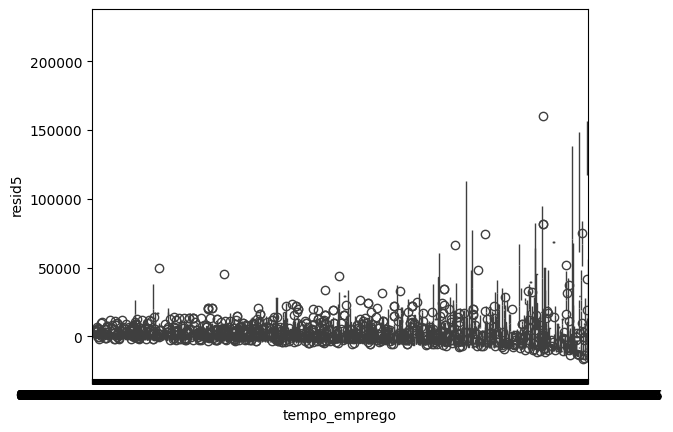

In [25]:
# 2. Fazer uma análise de resíduo.
renda['resid5'] = reg_sim1.resid

# Gráfico
sns.boxplot(x = 'tempo_emprego', y = 'resid5', data = renda)

<Axes: xlabel='tempo_emprego', ylabel='resid6'>

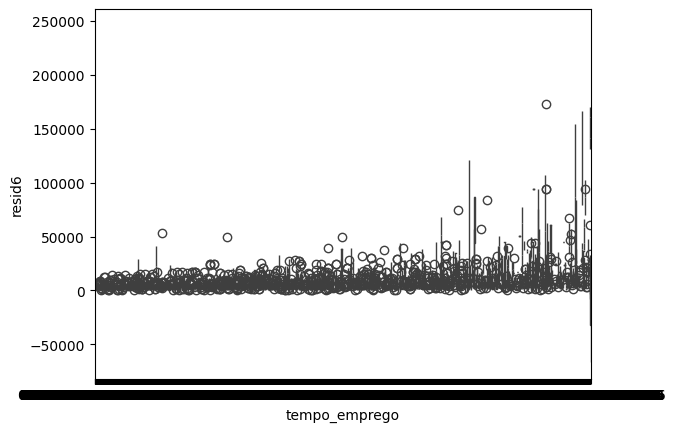

In [26]:
renda['resid6'] = reg_sim3.resid

# Gráfico
sns.boxplot(x = 'tempo_emprego', y = 'resid6', data = renda)

Ambos os resultados apresentam muitos valores de outsiders, muito distintos da média, variando apenas a forma de crescimento da reta.

In [27]:
# 3. Ajustar regressão linear múltipla para explicar renda de acordo com as demais variáveis.
reg_mul1 = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia', 
                  data = renda).fit()
reg_mul1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     86.04
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:26:29   Log-Likelihood:            -1.5565e+05
No. Observations:               15000   AIC:                         3.114e+05
Df Residuals:                   14976   BIC:                         3.115e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5416.2939   2439.192     -2.221      0.026   -1.02e+04    -635.178
sexo[T.M]                         5306.2325    149.565     35.478      0.000    5013.067    5599.398
posse_de_veiculo[T.True]           -57.0279    142.058     -0.401      0.688    -335.479     221.424
posse_de_imovel[T.True]            203.5110    139.957      1.454      0.146     -70.821     477.843
tipo_renda[T.Bolsista]           -1182.1981   2597.874     -0.455      0.649   -6274.350    3909.954
tipo_renda[T.Empresário]           204.2057    160.244      1.274      0.203    -109.892     518.303
tipo_renda[T.Pensionista]        -3768.4307    223.674    -16.848      0.000   -4206.860   -3330.002
tipo_renda[T.Servidor público]    1457.2049    237.657      6.132      0.000     991.368    1923.042
educacao[T.Pós graduação]        -1052.2954   1645.432     -0.640      0.522   -4277.543    2172.952
educacao[T.Secundário]             419.6808    613.207      0.684      0.494    -782.280    1621.642
educacao[T.Superior completo]     1116.7147    618.072      1.807      0.071     -94.782    2328.211
educacao[T.Superior incompleto]    211.5156    691.326      0.306      0.760   -1143.568    1566.599
estado_civil[T.Separado]           711.7650   1168.317      0.609      0.542   -1578.280    3001.810
estado_civil[T.Solteiro]           746.6734   1145.839      0.652      0.515   -1499.312    2992.659
estado_civil[T.União]             -419.0412    250.496     -1.673      0.094    -910.044      71.962
estado_civil[T.Viúvo]              287.1642   1179.066      0.244      0.808   -2023.949    2598.277
tipo_residencia[T.Casa]            459.3835    566.125      0.811      0.417    -650.291    1569.058
tipo_residencia[T.Com os pais]     -78.5372    635.471     -0.124      0.902   -1324.137    1167.063
tipo_residencia[T.Comunitário]   -1316.6044   1125.856     -1.169      0.242   -3523.420     890.211
tipo_residencia[T.Estúdio]        1394.1227   1023.186      1.363      0.173    -611.447    3399.692
tipo_residencia[T.Governamental]   973.0529    672.420      1.447      0.148    -344.972    2291.077
qtd_filhos                        -638.5561   1138.094     -0.561      0.575   -2869.359    1592.247
idade                              156.0997      7.938     19.666      0.000     140.541     171.659
qt_pessoas_residencia              891.3544   1135.989      0.785      0.433   -1335.324    3118.032
==============================================================================
Omnibus:                    21817.909   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13308896.857
Skew:                           8.594   Prob(JB):                         0.00
Kurtosis:                     147.910   

In [28]:
# Explicando uma variação de renda em relação essas variáveis
reg_mul2 = smf.ols('np.sqrt(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia', 
                  data = renda).fit()
reg_mul2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(renda)   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     143.4
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:26:30   Log-Likelihood:                -72882.
No. Observations:               15000   AIC:                         1.458e+05
Df Residuals:                   14976   BIC:                         1.460e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            9.7523      9.790      0.996      0.319      -9.437      28.941
sexo[T.M]                           27.7331      0.600     46.200      0.000      26.557      28.910
posse_de_veiculo[T.True]             0.4630      0.570      0.812      0.417      -0.655       1.581
posse_de_imovel[T.True]              1.8526      0.562      3.298      0.001       0.752       2.954
tipo_renda[T.Bolsista]               1.1643     10.427      0.112      0.911     -19.273      21.602
tipo_renda[T.Empresário]             2.3983      0.643      3.729      0.000       1.138       3.659
tipo_renda[T.Pensionista]          -17.8148      0.898    -19.844      0.000     -19.574     -16.055
tipo_renda[T.Servidor público]       8.0702      0.954      8.461      0.000       6.201       9.940
educacao[T.Pós graduação]           -5.9471      6.604     -0.901      0.368     -18.892       6.998
educacao[T.Secundário]               0.1888      2.461      0.077      0.939      -4.635       5.013
educacao[T.Superior completo]        4.5400      2.481      1.830      0.067      -0.322       9.402
educacao[T.Superior incompleto]     -0.5993      2.775     -0.216      0.829      -6.038       4.839
estado_civil[T.Separado]             6.5041      4.689      1.387      0.165      -2.687      15.695
estado_civil[T.Solteiro]             6.2219      4.599      1.353      0.176      -2.792      15.236
estado_civil[T.União]               -1.4972      1.005     -1.489      0.136      -3.468       0.473
estado_civil[T.Viúvo]                4.5276      4.732      0.957      0.339      -4.748      13.803
tipo_residencia[T.Casa]              1.5761      2.272      0.694      0.488      -2.878       6.030
tipo_residencia[T.Com os pais]      -0.4543      2.550     -0.178      0.859      -5.454       4.545
tipo_residencia[T.Comunitário]      -7.5177      4.519     -1.664      0.096     -16.375       1.339
tipo_residencia[T.Estúdio]           7.5384      4.107      1.836      0.066      -0.511      15.588
tipo_residencia[T.Governamental]     2.5975      2.699      0.962      0.336      -2.692       7.887
qtd_filhos                          -5.0993      4.568     -1.116      0.264     -14.053       3.854
idade                                0.7329      0.032     23.004      0.000       0.670       0.795
qt_pessoas_residencia                6.5280      4.559      1.432      0.152      -2.409      15.465
==============================================================================
Omnibus:                     7924.721   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103751.018
Skew:                           2.244   Prob(JB):                         0.00
Kurtosis:                      15.077   

4. Remover as variáveis não significantes.

Percebemos que o estudo do logarítimo de renda tem uma melhor aproximação que a de renda em si, uma vez que este tem uma valor maior. <br> 
Entre as variáveis analisadas nota-se que sexo, posse_de_veiculo, posse_de_imovel, tipo_renda (com excessão de Bolsista) e idade tem P-values menores que 5%.

In [29]:
reg_mul3 = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + idade', 
                   data=renda).fit()
reg_mul3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     239.6
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:26:30   Log-Likelihood:            -1.5568e+05
No. Observations:               15000   AIC:                         3.114e+05
Df Residuals:                   14991   BIC:                         3.114e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -2317.9097    335.466     -6.910      0.000   -2975.464   -1660.355
sexo[T.M]                       5304.0848    148.231     35.783      0.000    5013.534    5594.636
posse_de_veiculo[T.True]          47.3368    140.532      0.337      0.736    -228.123     322.796
posse_de_imovel[T.True]          237.6182    137.394      1.729      0.084     -31.691     506.928
tipo_renda[T.Bolsista]          -636.7810   2598.894     -0.245      0.806   -5730.930    4457.368
tipo_renda[T.Empresário]         253.6633    159.220      1.593      0.111     -58.428     565.755
tipo_renda[T.Pensionista]      -3830.8633    222.255    -17.236      0.000   -4266.511   -3395.216
tipo_renda[T.Servidor público]  1598.2193    236.548      6.756      0.000    1134.555    2061.883
idade                            149.8428      7.353     20.379      0.000     135.430     164.255
==============================================================================
Omnibus:                    21787.544   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13168562.117
Skew:                           8.573   Prob(JB):                         0.00
Kurtosis:                     147.138   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
reg_mul4 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + idade', 
                   data=renda).fit()
reg_mul4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     419.7
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:26:30   Log-Likelihood:                -17909.
No. Observations:               15000   AIC:                         3.584e+04
Df Residuals:                   14991   BIC:                         3.590e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.1966      0.034    209.119      0.000       7.129       7.264
sexo[T.M]                          0.7260      0.015     47.741      0.000       0.696       0.756
posse_de_veiculo[T.True]           0.0409      0.014      2.840      0.005       0.013       0.069
posse_de_imovel[T.True]            0.0744      0.014      5.275      0.000       0.047       0.102
tipo_renda[T.Bolsista]             0.3189      0.267      1.196      0.232      -0.204       0.841
tipo_renda[T.Empresário]           0.0955      0.016      5.847      0.000       0.063       0.128
tipo_renda[T.Pensionista]         -0.4429      0.023    -19.424      0.000      -0.488      -0.398
tipo_renda[T.Servidor público]     0.2302      0.024      9.487      0.000       0.183       0.278
idade                              0.0169      0.001     22.459      0.000       0.015       0.018
==============================================================================
Omnibus:                       87.645   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.666
Skew:                           0.148   Prob(JB):                     1.02e-21
Kurtosis:                       3.259   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
reg_mul5 = smf.ols('np.sqrt(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + idade', 
                   data = renda).fit()
reg_mul5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(renda)   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     397.1
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:26:30   Log-Likelihood:                -72933.
No. Observations:               15000   AIC:                         1.459e+05
Df Residuals:                   14991   BIC:                         1.460e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         27.7668      1.348     20.591      0.000      25.124      30.410
sexo[T.M]                         27.6485      0.596     46.402      0.000      26.481      28.816
posse_de_veiculo[T.True]           0.9776      0.565      1.731      0.084      -0.130       2.085
posse_de_imovel[T.True]            2.0653      0.552      3.739      0.000       0.983       3.148
tipo_renda[T.Bolsista]             4.2293     10.447      0.405      0.686     -16.248      24.706
tipo_renda[T.Empresário]           2.7100      0.640      4.234      0.000       1.455       3.965
tipo_renda[T.Pensionista]        -18.0442      0.893    -20.197      0.000     -19.795     -16.293
tipo_renda[T.Servidor público]     8.9270      0.951      9.388      0.000       7.063      10.791
idade                              0.6913      0.030     23.389      0.000       0.633       0.749
==============================================================================
Omnibus:                     7899.368   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101578.525
Skew:                           2.241   Prob(JB):                         0.00
Kurtosis:                      14.935   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='renda', ylabel='resid7'>

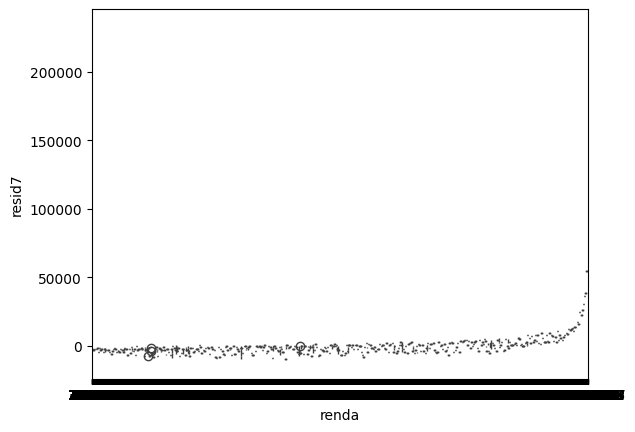

In [33]:
# 5. Analisar resíduos e avaliar a qualidade do ajuste.
#Analisando os resíduos de reg_mul3
renda['resid7'] = reg_mul3.resid

# Gráfico
sns.boxplot(x = 'renda', y = 'resid7', data = renda)

<Axes: xlabel='renda', ylabel='resid8'>

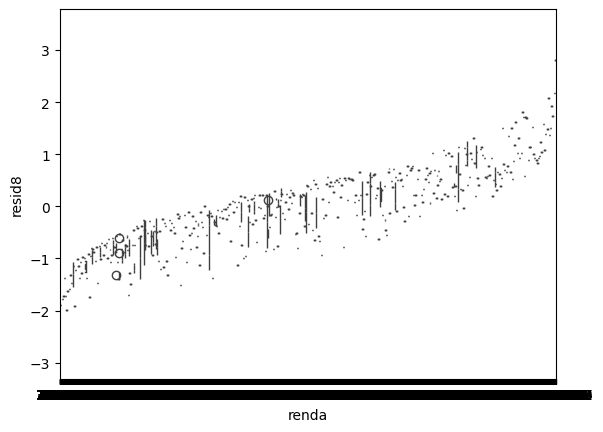

In [34]:
#Analisando os resíduos de reg_mul4
renda['resid8'] = reg_mul4.resid

# Gráfico
sns.boxplot(x = 'renda', y = 'resid8', data = renda)

<Axes: xlabel='renda', ylabel='resid9'>

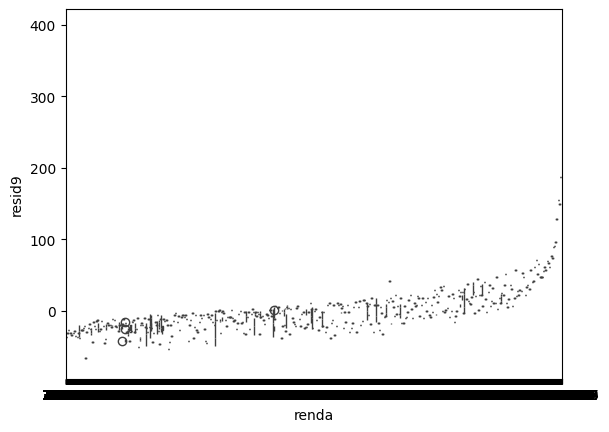

In [35]:
#Analisando os resíduos de reg_mul5
renda['resid9'] = reg_mul5.resid

# Gráfico
sns.boxplot(x = 'renda', y = 'resid9', data = renda)

Considerando a variação de resíduos e os valores de ajustes encontrados nos modelos estudados observamos que o ajuste logarítimo de renda é melhor.